In [1]:
import cv2
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model

from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np
import pandas as pd


In [2]:
TRAINING_DIR = "data/"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150),class_mode='binary')
VALIDATION_DIR = "Face Mask Dataset/Test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150),
                                                         class_mode='binary')


Found 236 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "Face Mask Dataset/Train"
test_dir = "Face Mask Dataset/Test"

# Import data from directories and turn it into batches
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    # batch_size=32,
                                                    target_size=(224, 224), class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    # batch_size=32,
                                                    target_size=(224, 224), class_mode='binary')

Found 174 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [20]:
train_generator

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(100, (3, 3), activation='relu',
                           input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(100, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [12]:
history = model.fit_generator(train_generator,
                              epochs=3,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

NameError: name 'checkpoint' is not defined

In [23]:
history = model.fit(train_generator,
                              epochs=3,
                              steps_per_epoch=len(train_generator),
                        validation_data=test_generator,
                        validation_steps=len(test_generator))

Epoch 1/3


InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/binary_crossentropy/logistic_loss/mul/BroadcastGradientArgs' defined at (most recent call last):
    File "c:\Users\saipr\anaconda3\envs\cp\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\saipr\anaconda3\envs\cp\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\saipr\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\saipr\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\saipr\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\saipr\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\saipr\anaconda3\envs\cp\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\saipr\anaconda3\envs\cp\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "c:\Users\saipr\anaconda3\envs\cp\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\saipr\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 473, in dispatch_queue
      await self.process_one()
    File "C:\Users\saipr\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 462, in process_one
      await dispatch(*args)
    File "C:\Users\saipr\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 369, in dispatch_shell
      await result
    File "C:\Users\saipr\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 664, in execute_request
      reply_content = await reply_content
    File "C:\Users\saipr\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 355, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\saipr\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\saipr\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\saipr\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\saipr\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\saipr\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\saipr\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\saipr\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\saipr\AppData\Local\Temp\ipykernel_17540\2219868536.py", line 1, in <cell line: 1>
      history = model.fit(train_generator,
    File "c:\Users\saipr\anaconda3\envs\cp\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saipr\anaconda3\envs\cp\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\saipr\anaconda3\envs\cp\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\saipr\anaconda3\envs\cp\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\saipr\anaconda3\envs\cp\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\saipr\anaconda3\envs\cp\lib\site-packages\keras\engine\training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "c:\Users\saipr\anaconda3\envs\cp\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 576, in minimize
      grads_and_vars = self._compute_gradients(
    File "c:\Users\saipr\anaconda3\envs\cp\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 634, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "c:\Users\saipr\anaconda3\envs\cp\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/binary_crossentropy/logistic_loss/mul/BroadcastGradientArgs'
Incompatible shapes: [72,1] vs. [32,1]
	 [[{{node gradient_tape/binary_crossentropy/logistic_loss/mul/BroadcastGradientArgs}}]] [Op:__inference_train_function_1839]

import pandas as pd
pd.DataFrame(history.history).plot()


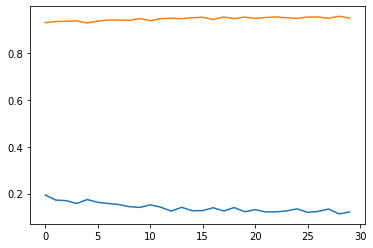

In [13]:
plt.plot(pd.DataFrame(history.history))

In [14]:
model.save('own_yes_no_comp.h5')

In [12]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
# model=tf.keras.models.load_model('weights/own_yes_no.h5')
model=tf.keras.models.load_model('own_yes_no.h5')

class_labels=['with_mask ', 'without_mask']
face_clsfr = cv2.CascadeClassifier(
    "haarcascade_frontalface_default.xml"
    )


In [19]:
webcam.release()
cv2.destroyAllWindows()

In [3]:
import serial,time

size=4
model=tf.keras.models.load_model('own_yes_no.h5')

labels_dict = {1: 'with_mask', 0: 'without_mask'}
color_dict={0:(0,0,255),1:(0,255,0)}

classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
webcam = cv2.VideoCapture(1)

ArduinoSerial=serial.Serial('com19',9600,timeout=0.1)
time.sleep(1)


while True:
    (rval, im) = webcam.read()
    im = cv2.flip(im, 1, 1)  
    mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))
    faces = classifier.detectMultiScale(mini)
    


    
    for f in faces:
        (x, y, w, h) = [v * size for v in f]  

        #sending coordinates to arduino
        string='X{0:d}Y{1:d}'.format((x+w//2),(y+h//2))
        print(string,' ',string.encode('utf-8'))
        ArduinoSerial.write(string.encode('utf-8'))

        face_img = im[y:y+h, x:x+w]
        resized = cv2.resize(face_img, (150, 150))
        normalized = resized/255.0
        reshaped = np.reshape(normalized, (1, 150, 150, 3))
        reshaped = np.vstack([reshaped])
        result = model.predict(reshaped)
        print(result[0][0]-0.45)

        label = int(np.round((result)[0][0]-0.40))
        # print(class_labels[label])
        
        res= 'P{0:d}'.format( label )
        ArduinoSerial.write(res.encode('utf-8'))
        
        print(result,"\n",string.encode('utf-8'),'\n',x, y, w, h,"\n",res,res.encode('utf-8'),'\n')
        
        
        #plot the center of the face
        cv2.circle(rval,(x+w//2,y+h//2),2,(0,255,0),2)

        cv2.rectangle(im, (x, y), (x+w, y+h), color_dict[label], 2)
        cv2.rectangle(im, (x, y-40), (x+w, y), color_dict[label], -1)
        cv2.putText(im, labels_dict[label], (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    if key == 27:  
        break
webcam.release()
cv2.destroyAllWindows()

X154Y170   b'X154Y170'
0.3344887375831604
[[0.78448874]] 
 b'X154Y170' 
 32 48 244 244 
 P0 b'P0' 

X348Y328   b'X348Y328'
0.5342504262924195
[[0.9842504]] 
 b'X348Y328' 
 240 220 216 216 
 P1 b'P1' 

X350Y318   b'X350Y318'
0.4997256875038147
[[0.9497257]] 
 b'X350Y318' 
 272 240 156 156 
 P1 b'P1' 

X346Y314   b'X346Y314'
0.4979483366012573
[[0.94794834]] 
 b'X346Y314' 
 264 232 164 164 
 P1 b'P1' 

X480Y268   b'X480Y268'
0.5254807949066163
[[0.9754808]] 
 b'X480Y268' 
 396 184 168 168 
 P1 b'P1' 

X478Y270   b'X478Y270'
0.5187513709068299
[[0.9687514]] 
 b'X478Y270' 
 404 196 148 148 
 P1 b'P1' 

X514Y262   b'X514Y262'
0.49757109880447387
[[0.9475711]] 
 b'X514Y262' 
 440 188 148 148 
 P1 b'P1' 

X514Y262   b'X514Y262'
0.49757109880447387
[[0.9475711]] 
 b'X514Y262' 
 440 188 148 148 
 P1 b'P1' 

X512Y252   b'X512Y252'
0.513032603263855
[[0.9630326]] 
 b'X512Y252' 
 432 172 160 160 
 P1 b'P1' 

X512Y232   b'X512Y232'
0.5415176033973694
[[0.9915176]] 
 b'X512Y232' 
 424 144 176 176 
 

In [8]:
pathdir = "massk.jpg"

def local_loader_class(filename):
    import cv2
    import numpy
    from numpy import asarray
    img=cv2.imread(filename)
    img=asarray(img)
    img=tf.convert_to_tensor(img)
    img = tf.image.resize(img, size=[150, 150])
    img = tf.convert_to_tensor(img)
    img = tf.expand_dims(img, axis=0)
    img = img/255

    return img


array=local_loader_class(pathdir)
array
pred=model.predict(array)
print(pred)
label = int(np.round(pred[0][0]))
class_labels[int(np.round(pred))]


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type NoneType).